# Coronavirus Analysis
<br>

<img src='https://edx.prometheus.org.ua/asset-v1:Prometheus+COVID101+2020_T1+type@asset+block@JtVH5Khvihib7dBDFY9ZDR.jpg' style='width: 70%'><br>

## Business Understanding

After the COVID-19 pandemic, we have several questions:

- Is first world countries much safer than third ones?
- What is the speed that the coronavirus is spreading by?
- How about the total number of death?
- Is it recommended to travel these days?


 Importing our necessary libraries to visualize the data

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#If you want the real-time analysis you can use this link instead: https://covid.ourworldindata.org/data/ecdc/full_data.csv
#This analysis was made by 04/04/2020

df = pd.read_csv('full_data.csv', index_col='date')
df.head()

,location,new_cases,new_deaths,total_cases,total_deaths
date,,,,,
2019-12-31,Afghanistan,0,0,0,0
2020-01-01,Afghanistan,0,0,0,0
2020-01-02,Afghanistan,0,0,0,0
2020-01-03,Afghanistan,0,0,0,0
2020-01-04,Afghanistan,0,0,0,0


## Data Understanding

We have a dataset contains country's name, new cases, new deaths, total cases, total deaths <br>
We can answer our questions with this data provided

In [14]:

def country_dataframe(name):
    """
    INPUT -> OUTPUT
    str -> pd.DataFrame()
    """
    return df[df['location']==name]


def plot_cases_death(country):
    """
    INPUT -> OUTPUT
    pd.DataFrame -> plot (total cases and deaths of this country)
    """
    plt.plot(range(country.shape[0]), country.total_cases, label='Total Cases')
    plt.plot(range(country.shape[0]), country.total_deaths, label='Total Deaths')
    plt.xlabel('Days')
    plt.ylabel('population')
    plt.legend()
    plt.show()


def plot_cases(country1, country2):
    """
    INPUT -> OUTPUT
    plot_cases(pd.DataFrame,pd.DataFrame) -> plot (total cases of those two countries)
    """
    plt.plot(range(country1.shape[0]), country1.total_cases, label=f"Total Cases of {country1.loc['2020-01-20', 'location']}")
    plt.plot(range(country2.shape[0]), country2.total_cases, label=f"Total Cases of {country2.loc['2020-01-20', 'location']}")
    plt.xlabel('Days')
    plt.ylabel('population')
    plt.legend()
    plt.show()


def plot_death(country1, country2):
    """
    INPUT -> OUTPUT
    plot_cases(pd.DataFrame,pd.DataFrame) -> plot (total deaths of those two countries)
    """
    plt.plot(range(country1.shape[0]), country1.total_deaths, label=f"Total Deaths of {country1.loc['2020-01-20', 'location']}")
    plt.plot(range(country2.shape[0]), country2.total_deaths, label=f"Total Deaths of {country2.loc['2020-01-20', 'location']}")
    plt.xlabel('Days')
    plt.ylabel('population')
    plt.legend()
    plt.show()


We can compare any two countries (developed and developing) and this graph remain <br>
Always developed countries' rates are higher than developing ones


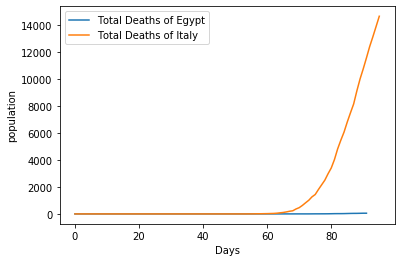

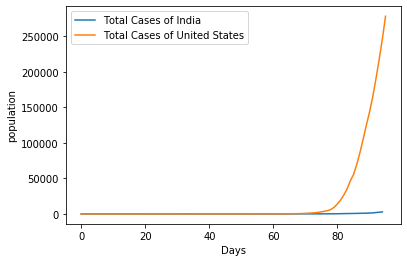

In [15]:
eg = country_dataframe('Egypt')
it = country_dataframe('Italy')
plot_death(eg, it)

us = country_dataframe('United States')
ind = country_dataframe('India')
plot_cases(ind, us)

## Data Preparation

Now we have to prepare our data to be ready to be visualized
+ First, we make the two small datasets of each country
* Second, we remove the country's name as we want only the numbers
+ Third, group these numbers by dates to see daily increasement of the pandemic
* Fourth, plot the data to see it clearly

In [16]:
# Total cases based on developed and developing countries

class Total():
    """
    INPUT: This class takes two [lists], 
    countries1 - should be developed countries 
    countries2 - should be developing ones (dtype=str)
    You can input any two lists but this class is
    designed to compare developed and developing countries
    
    OUTPUT: The main function of this class is to plot
    the data given based on the countries provided in the input
    
    Total([list],[list]) -> plot
    """
    
    def __init__(self, countries1, countries2):
        self.dev = df[df['location'].isin(countries1)]
        self.ving = df[df['location'].isin(countries2)]
        self.dev.drop('location', axis=1, inplace=True)
        self.ving.drop('location', axis=1, inplace=True)
        self.sum_dev = self.dev.groupby('date').sum()
        self.mean_dev = self.dev.groupby('date').mean()
        self.sum_ving = self.ving.groupby('date').sum()
        self.mean_ving = self.ving.groupby('date').mean()
        
        if len(countries1) == 1 or len(countries2) == 1:
            self.label_cdev = f"Total Cases of {countries1[0]}"
            self.label_ddev = f"Total Deaths of {countries1[0]}"
            self.label_cving = f"Total Cases of {countries2[0]}"
            self.label_dving = f"Total Deaths of {countries2[0]}"
            self.sdev = f"New Cases of {countries2[0]}"
            self.sving = f"New Cases of {countries2[0]}"
        else:
            self.label_cdev = "Total Cases of Developed Countries"
            self.label_ddev = "Total Deaths of Developed Countries"
            self.label_cving = "Total Cases of Developing Countries"
            self.label_dving = "Total Deaths of Developing Countries"
            self.sdev = "New Cases of Developed Countries"
            self.sving = "New Cases of Developing Countries"
    
    def plot_total_cases(self): 
        """
        Plotting total cases of the two countries'
        it takes no arguments just apply this 
        method to your created object
        """
        plt.plot(range(self.sum_dev.shape[0]), self.sum_dev.total_cases, label=self.label_cdev)
        plt.plot(range(self.sum_ving.shape[0]), self.sum_ving.total_cases, label=self.label_cving)
        plt.xlabel('Days')
        plt.ylabel('population')
        plt.legend()
        plt.show()
        
    def plot_total_death(self):
        """
        Plotting total deaths of the two countries'
        it takes no arguments just apply this 
        method to your created object
        """
        plt.plot(range(self.sum_dev.shape[0]), self.sum_dev.total_deaths, label=self.label_ddev)
        plt.plot(range(self.sum_ving.shape[0]), self.sum_ving.total_deaths, label=self.label_dving)
        plt.xlabel('Days')
        plt.ylabel('population')
        plt.legend()
        plt.show()
    
    def plot_cases_dev(self):
        """
        Plotting cases of the developed country/ies
        it takes no arguments just apply this 
        method to your created object
        """
        plt.plot(range(self.sum_dev.shape[0]), self.sum_dev.total_cases, label=self.label_cdev)
        plt.xlabel('Days')
        plt.ylabel('population')
        plt.legend()
        plt.show()
    
    def plot_cases_ving(self):
        """
        Plotting cases of the developing country/ies
        it takes no arguments just apply this 
        method to your created object
        """
        plt.plot(range(self.sum_ving.shape[0]), self.sum_ving.total_cases, label=self.label_cving)
        plt.xlabel('Days')
        plt.ylabel('population')
        plt.legend()
        plt.show()
    
    def plot_death_ved(self):
        """
        Plotting deaths of the developed country/ies
        it takes no arguments just apply this 
        method to your created object
        """
        plt.plot(range(self.sum_dev.shape[0]), self.sum_dev.total_deaths, label=self.label_dved)
        plt.xlabel('Days')
        plt.ylabel('population')
        plt.legend()
        plt.show()
    
    def plot_death_ving(self):
        """
        Plotting deaths of the developing country/ies
        it takes no arguments just apply this 
        method to your created object
        """
        plt.plot(range(self.sum_ving.shape[0]), self.sum_ving.total_deaths, label=self.label_dving)
        plt.xlabel('Days')
        plt.ylabel('population')
        plt.legend()
        plt.show()
    
    def speed(self):
        """
        Plotting the speed of virus' spreading
        it takes no arguments just apply this 
        method to your created object
        """
        plt.plot(range(self.sum_dev.shape[0]), self.sum_dev.new_cases, label=self.sdev)
        plt.plot(range(self.sum_ving.shape[0]), self.sum_ving.new_cases, label=self.sving)
        plt.xlabel('Days')
        plt.ylabel('population')
        plt.legend()
        plt.show()
    

<br>
compare the two worlds in total cases there
<br><br>


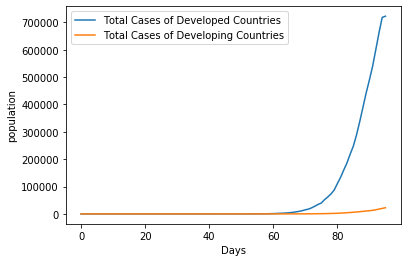

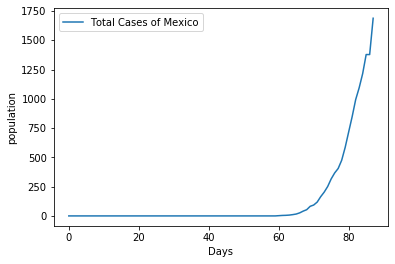

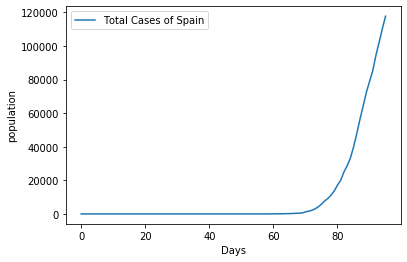

In [17]:

countries1 = [ 'Belgium', 'Canada', 'Denmark', 'France', 'Germany', 'Greece', 'Italy', 'Luxembourg',\
              'Netherlands', 'Norway', 'Portugal', 'Spain', 'Turkey', 'United Kingdom', 'United States']
countries2 = ['Afghanistan', 'Albania', 'Algeria', 'Brazil', 'Uruguay', 'Aruba', 'Armenia', 'Bahrain',\
              'Kuwait', 'India', 'Chile', 'Morocco', 'Egypt', 'Mexico', 'Niger']

total = Total(countries1, countries2)
total.plot_total_cases()

mex_spn = Total(['Spain'],['Mexico'])
mex_spn.plot_cases_ving()
mex_spn.plot_cases_dev()

Ok, now let's see what is the speed that the coronavirus is spreading by?

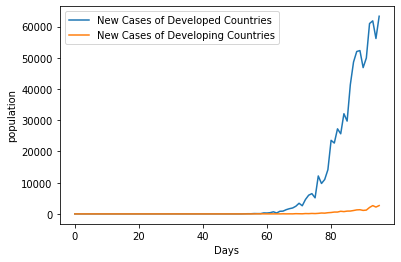

In [18]:
total.speed()

We can see that the virus is spreading in developed countries more than developing ones approximetly 30 times faster <br>
How about the deaths?

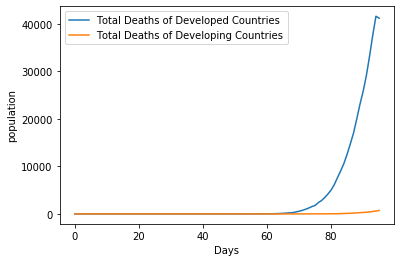

In [19]:
total.plot_total_death()

 The deaths rate is also unfortunetly high 


## Evaluate the Results
By visualize all the data provided, we can say that developed countries are more infected than developing ones<br>
They are also higher in deaths and new cases rates<br>
As a result, I can say that travel is dangerous.


#### So, this answer is up to you, will you travel these days?
 I am not an expert, these analysis may be not 100% true but I hope to all the world to be safe again <br>
 Also you, please, stay home stay safe <3 <br><br>
 You can found the complete analysis on my [Medium](https://medium.com/@aliyoussef200399/who-is-better-now-developed-countries-or-developing-ones-a72336f3fd1c?sk=296d365d3575af1d2663b0f98663bc44)

#